# UK Housing Price Prediction - using PyCaret

**Author:** Jo Naulaerts

## 1. Imports and installs

In [1]:
#pip install pyarrow
#pip install fastparquet

In [2]:
import pandas as pd
import numpy as np

## 2. Load Data

In [3]:
df = pd.read_parquet('../Data/housing_features_final.parquet')

## 3. Prepare Features and Target
This code defines the target variable as 'log_price' and creates a list of columns to drop, including 'log_price', 'price', 'date_of_transfer', and 'transaction_unique_identifier' if they exist in the DataFrame. It then defines the feature columns by excluding these drop columns from the DataFrame's columns. Finally, it assigns the features subset of the DataFrame to X, and the target column to y, preparing the data for modeling by separating predictors from the target variable. This step is essential for supervised learning tasks where the model learns to predict the target based on the input features.

In [4]:
target = 'log_price'
drop_cols = [col for col in ['log_price', 'price', 'date_of_transfer', 'transaction_unique_identifier'] if col in df.columns]
features = [col for col in df.columns if col not in drop_cols]
X = df[features]
y = df[target]


## 4. Combine for PyCaret
This code creates a new DataFrame, df_pycaret, by copying the features data X and then adds the target column log_price back into it. This combined DataFrame is formatted to be used directly with PyCaret, which requires a single DataFrame containing both feature columns and the target variable for its machine learning setup and modeling functions. This step facilitates passing the complete dataset with features and target into PyCaret's workflow.

In [5]:
df_pycaret = X.copy()
df_pycaret[target] = y

This code identifies all columns in the DataFrame df_pycaret that have the pandas Period data type, which represents time periods. It then converts each of these Period-type columns into strings, allowing easier handling and compatibility with machine learning tools like PyCaret that may not support Period types directly. Converting periods to strings prevents data type issues during modeling and preprocessing by representing temporal information in a simple string format.

In [6]:
import pandas as pd

# Identify period columns
period_cols = [col for col in df_pycaret.columns if pd.api.types.is_period_dtype(df_pycaret[col])]
print("Period columns to fix:", period_cols)

# Option 1: Convert period to string
for col in period_cols:
    df_pycaret[col] = df_pycaret[col].astype(str)

Period columns to fix: ['year_month']


C:\Users\abdul\AppData\Local\Temp\ipykernel_5560\3370546603.py:4: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  period_cols = [col for col in df_pycaret.columns if pd.api.types.is_period_dtype(df_pycaret[col])]


## 5. Finalize Best Model and Evaluate
This code automates a regression modeling workflow using PyCaret, a high-level machine learning library. It starts by calling setup() to initialize the environment, preprocess the data, normalize features, and remove multicollinearity, setting a random seed for reproducibility. Then, compare_models() trains multiple regression algorithms with cross-validation and selects the best-performing one based on accuracy metrics. The best model is finalized by retraining it on the entire dataset with finalize_model(), making it ready for deployment. Finally, predict_model() is used to generate predictions on holdout data, completing the end-to-end pipeline from data preparation through model selection and prediction without requiring manual intervention at each stage. This approach streamlines the modeling process and provides reliable model benchmarking and deployment in a few simple steps.

In [7]:
# ONLY use your 10,000-row sample for both setup and validation because the notebook kept crashing on the full dataset
df_small = df_pycaret.sample(n=500000, random_state=42)

from pycaret.regression import *
reg_setup = setup(
    data=df_small,
    target=target,
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best = compare_models()
final_model = finalize_model(best)
holdout_results = predict_model(final_model)   # DO NOT pass data=... unless it's [feature_names]

TypeError: Memory.__init__() got an unexpected keyword argument 'bytes_limit'

## 6. Visual Diagnostics
This sequence of code generates diagnostic and performance evaluation plots for a trained model using PyCaret's plot_model function. Specifically, it produces visualizations of feature importance, residuals, prediction errors, and learning curves. These plots help assess how well the model performs, identify areas for improvement, understand feature impacts, detect potential issues like heteroscedasticity or overfitting, and ultimately provide insights into the strengths and weaknesses of the trained model.

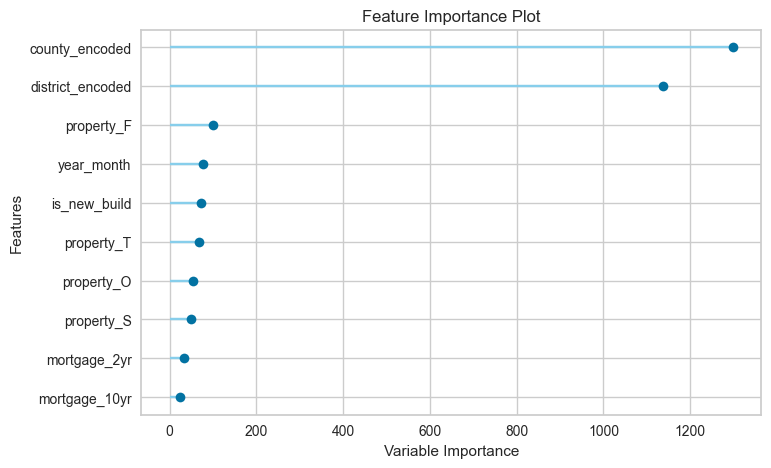

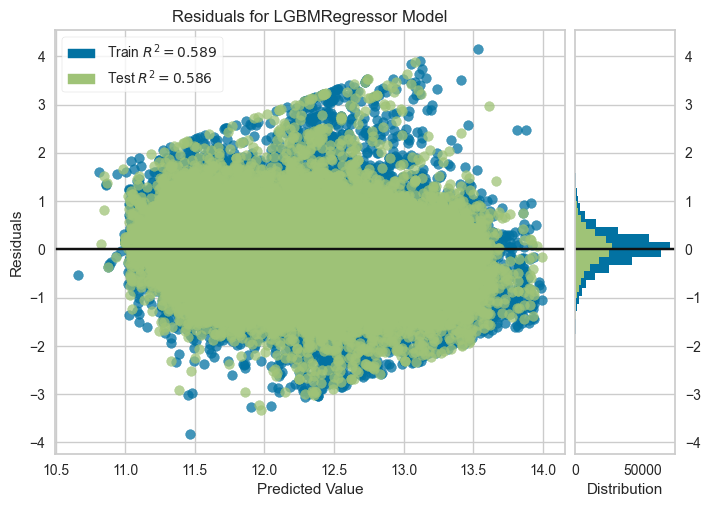

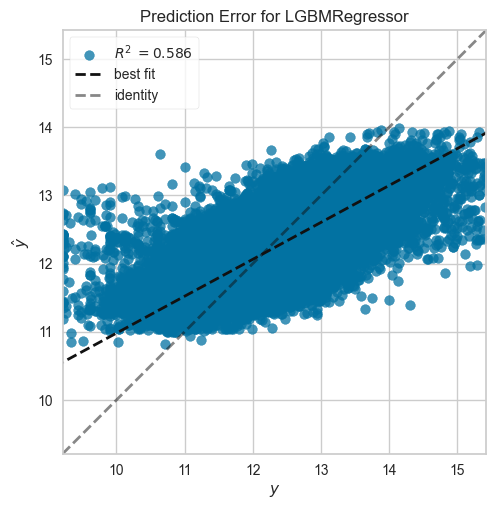

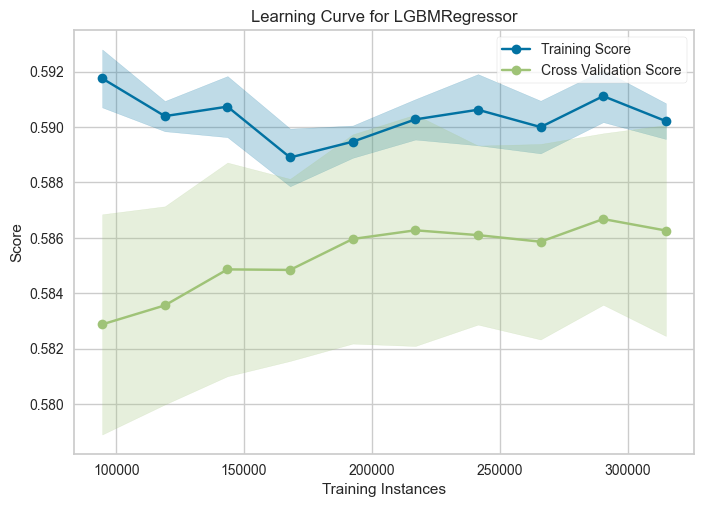

In [ ]:
plot_model(final_model, plot='feature')
plot_model(final_model, plot='residuals')
plot_model(final_model, plot='error')
plot_model(final_model, plot='learning')


In [ ]:
import os
import shutil

# Define the directory where you want to save the plot
save_dir = "Models\Model_metrics"
os.makedirs(save_dir, exist_ok=True)

# Save the plot in the current directory first
plot_model(final_model, plot='feature', save=True)
plot_model(final_model, plot='residuals', save=True)
plot_model(final_model, plot='error', save=True)
plot_model(final_model, plot='learning', save=True)

# Move the saved plot to the desired directory
shutil.move("Feature Importance.png", os.path.join(save_dir, "Feature_ImportanceV2.png"))
shutil.move("Residuals.png", os.path.join(save_dir, "ResidualsV2.png"))
shutil.move("Prediction Error.png", os.path.join(save_dir, "Prediction_ErrorV2.png"))
shutil.move("Learning Curve.png", os.path.join(save_dir, "Learning_CurveV2.png"))

'Models\\Model_metrics\\Learning_CurveV2.png'

## 7. Save the Model for Deployment

In [ ]:
save_model(final_model, 'Models\pycaret_best_housing_modelV2')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'month', 'quarter',
                                              'base_rate', 'mortgage_2yr',
                                              'mortgage_10yr',
                                              'exchange_rate_index',
                                              'is_new_build', 'day_of_week',
                                              'is_weekend', 'is_spring',
                                              'is_summer', 'is_autumn',
                                              'is_winter', 'month_sin',
                                              'month_cos', 'years_since_2008',
                                              'is_crisis_period',
                                              'is_recovery_p...
                  TransformerWrapper(include=['year_month'],
                                     transformer=TargetEncoder(cols=['year_m